In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1,28*28))
x_test = x_test.reshape((-1,28*28))
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [3]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Lambda
from keras.initializers import Constant

def dense_layer(k, act, dropout=True, **kwargs):
    initializer = 'he_normal' if act == 'relu' else 'glorot_uniform'
    return Dense(k, activation=act, kernel_initializer=initializer, **kwargs)

dropout = 0.2
model = Sequential()
model.add(dense_layer(32, act='relu', input_shape=(784,)))
model.add(Lambda(lambda x: K.dropout(x, level=dropout)))
model.add(dense_layer(32, act='relu'))
model.add(Lambda(lambda x: K.dropout(x, level=dropout)))
model.add(dense_layer(10, act='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
lambda_1 (Lambda)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
lambda_2 (Lambda)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 0s - loss: 0.5351 - acc: 0.8405 - val_loss: 0.6086 - val_acc: 0.8279
Epoch 2/50
60000/60000 [==============================] - 0s - loss: 0.5360 - acc: 0.8416 - val_loss: 0.5851 - val_acc: 0.8330
Epoch 3/50
60000/60000 [==============================] - 0s - loss: 0.5283 - acc: 0.8417 - val_loss: 0.5849 - val_acc: 0.8331
Epoch 4/50
60000/60000 [==============================] - 0s - loss: 0.5304 - acc: 0.8422 - val_loss: 0.5802 - val_acc: 0.8412
Epoch 5/50
60000/60000 [==============================] - 0s - loss: 0.5225 - acc: 0.8463 - val_loss: 0.5800 - val_acc: 0.8415
Epoch 6/50
60000/60000 [==============================] - 0s - loss: 0.5221 - acc: 0.8452 - val_loss: 0.6018 - val_acc: 0.8384
Epoch 7/50
60000/60000 [==============================] - 0s - loss: 0.5153 - acc: 0.8488 - val_loss: 0.5754 - val_acc: 0.8356
Epoch 8/50
60000/60000 [==============================] - 0s 

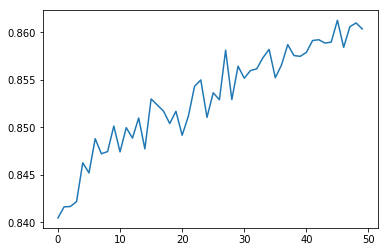

In [18]:
h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=2048)
plt.plot(h.history['acc']);

In [49]:
def predict(x, samples=10000):
    t = x.reshape((1,-1))
    t = t.repeat(samples, 0)
    ty = model.predict(t, batch_size=2048)
    y_ = np.mean(ty, 0)
    std = np.std(ty, 0)
    
    return y_, std


def plot_pred(i, samples=10000):
    y_, std = predict(x_test[i], samples)
    y = np.argmax(y_)
    # show img
    print(f'Prediction: {y}')
    print(f'Real      : {y_test[i]}')
    fig, ax = plt.subplots(ncols=2, figsize=(14,6))
    ax[0].imshow(x_test[i].reshape(28,28), cmap='gray')
    ax[0].axis('off')
    std_lines = [(y - 1.96*std[i], y + 1.96*std[i]) for i,y in enumerate(y_)]
    # plt.figure(figsize=(14,6))
    for i, (y1,y2) in enumerate(std_lines):
        ax[1].vlines(i, y1, y2, 'red', 'dashed', linewidth=2)
    ax[1].scatter(range(10), y_, s=200, c='b')
    ax[1].set_xticks(range(10))
    plt.show()


Prediction: 0
Real      : 0


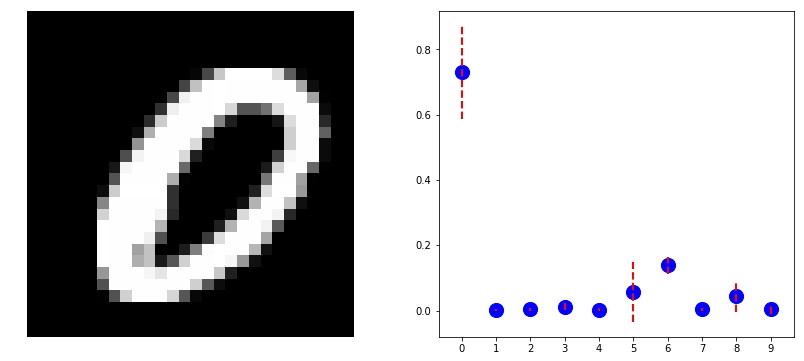

Prediction: 6
Real      : 6


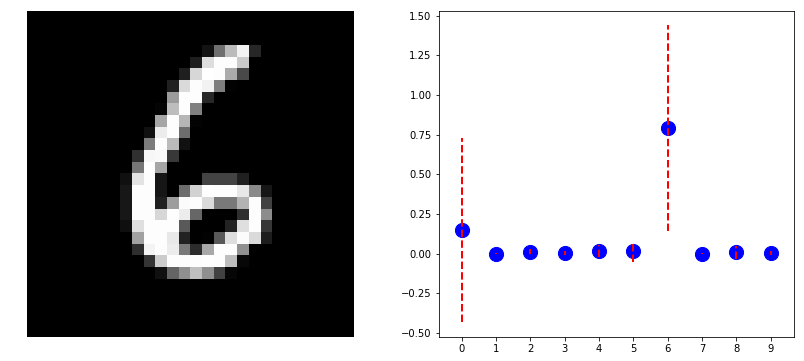

Prediction: 9
Real      : 9


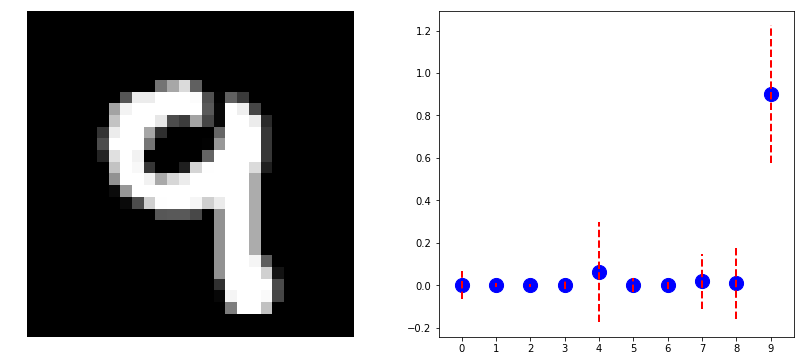

Prediction: 9
Real      : 9


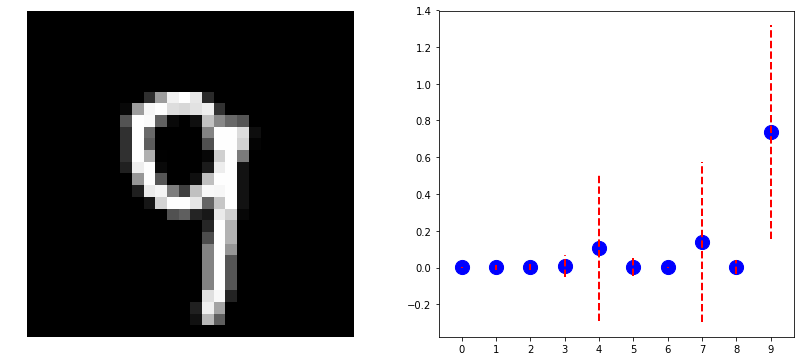

Prediction: 4
Real      : 4


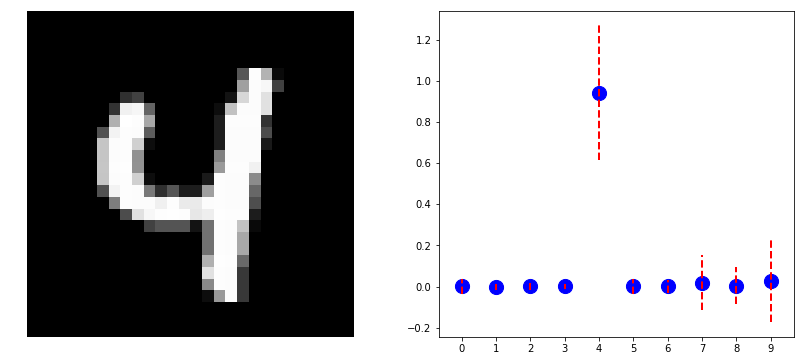

Prediction: 8
Real      : 8


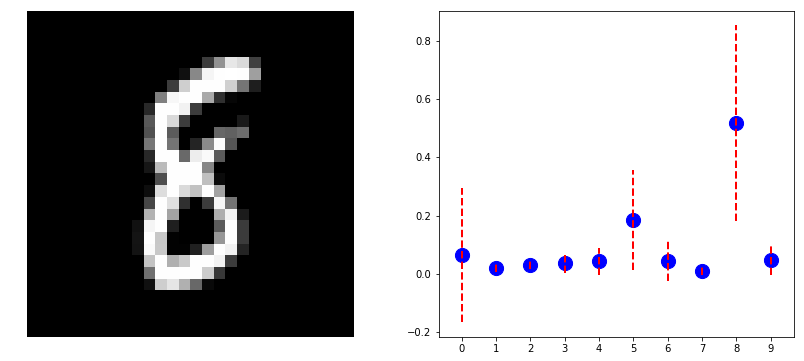

Prediction: 3
Real      : 3


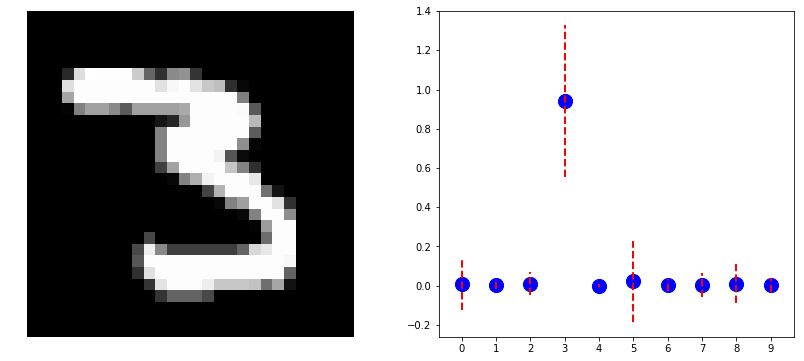

Prediction: 6
Real      : 6


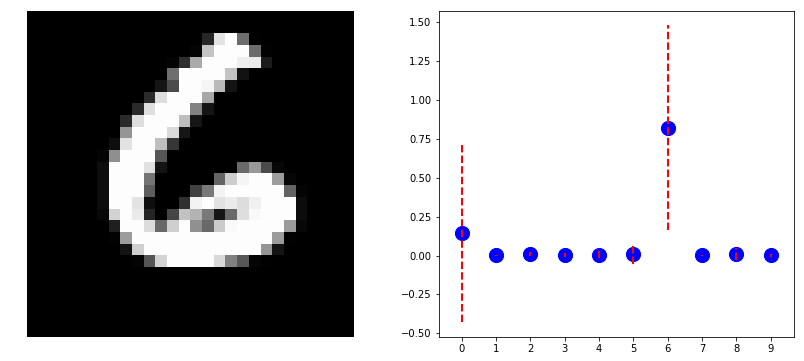

Prediction: 1
Real      : 1


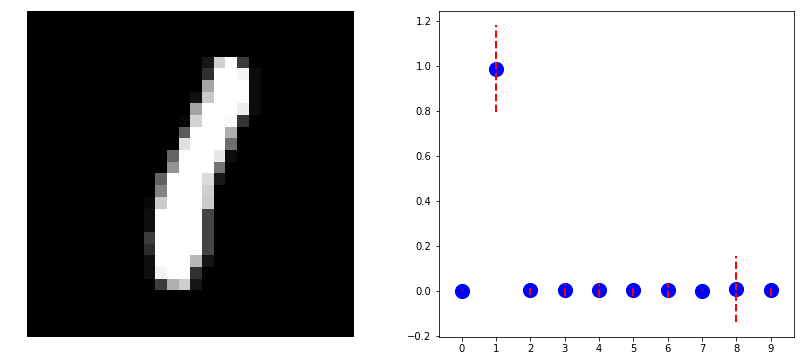

Prediction: 8
Real      : 8


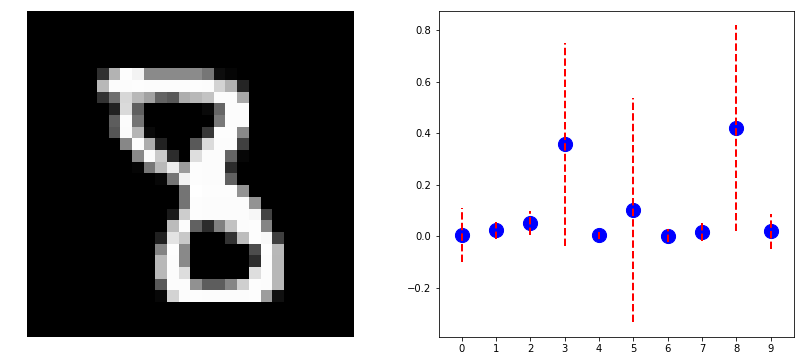

In [52]:
for _ in range(10):
    random_i = np.random.choice(len(x_test))
    plot_pred(random_i)